In [1]:
from graphviz import Digraph, Graph

In [2]:
problem_dir = '/Users/ironchefnate/source/recursive-datalog/benchmarks/scc'

In [3]:
f = open(problem_dir + '/edge.facts')
edges = f.readlines()

In [4]:
edges

['1\t2\n',
 '6\t7\n',
 '2\t3\n',
 '7\t4\n',
 '4\t5\n',
 '3\t4\n',
 '5\t6\n',
 '3\t8\n',
 '5\t9']

In [6]:
G = Digraph()
for edge in edges:
    a, b = tuple(edge.strip().split('\t'))
    G.edge(a,b)

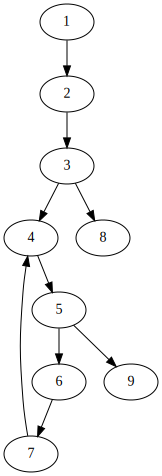

In [7]:
G

R11(x0) :- edge(x1, x0)                     // x0 is a sink  
R12(x0) :- edge(x0, x1)						// x0 is a source
R24(x0, x1) :- edge(x0, x1)					// edge
R17(x0, x1) :- R24(x0, x2), R24(x2, x1)     //
R17(x0, x1) :- R17(x2, x1), R24(x0, x2)     // path l >= 2
R10(x0, x0) :- R11(x1), R17(x1, x0)			// path from any sink to x0 
R10(x0, x1) :- R10(x0, x0), R17(x0, x1)     // path l>=2 from any sink to x0 and path l>=2 from x0 to x1

scc(x0, x1) :- R10(x0, x1), R12(x1)			// path l>=2 from any sink to x0
											// path l>=2 from x0 to x1
											// x1 is a source
										    // path(x0,x1) is a component of a path with at least three more edges
                                            
                                                                               
6	6
6	7
6	4
6	5
7	6
7	7
7	4
7	5
4	6
4	7
4	4
4	5
5	6
5	7
5	4
5	5
